# The Basics of SageMath

Lazaros Souvaitzis

Aristotle University of Thessaloniki

May 2020

For the course of "Astrophysics" (Masters program on computational physics)

You can download (+documentation) Sage here : https://www.sagemath.org/ 

Installation guide : https://doc.sagemath.org/html/en/installation/

In [1]:
version()

'SageMath version 8.9, Release Date: 2019-09-29'

In [2]:
%display latex

## 1. Plotting machine

Let's say we want to plot a parabola, $f(x)=sin(x^2)$

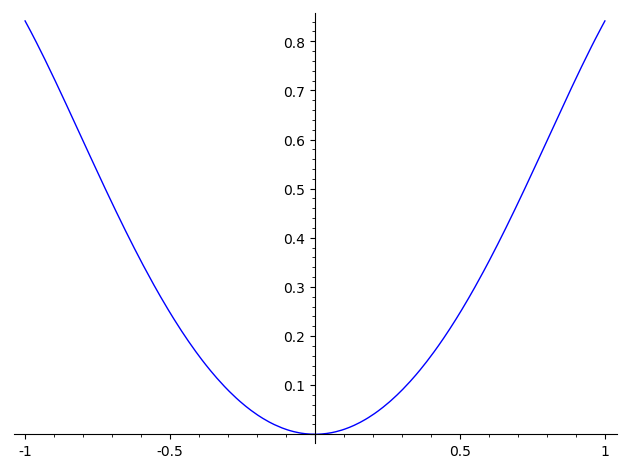

In [3]:
plot(sin(x^2))

But we want a specific x-iterval,line-thickness,color etc..

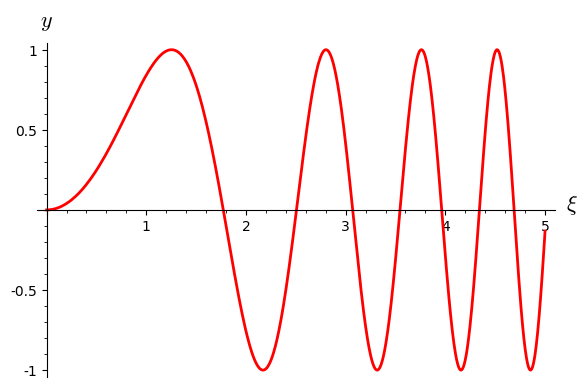

In [4]:
plot(sin(x^2), (0,5), color='red', thickness=2, axes_labels=[r"$\xi$", r"$y$"])

Multiple plots can be created by simply adding them (believe it or not!) with  '+' 


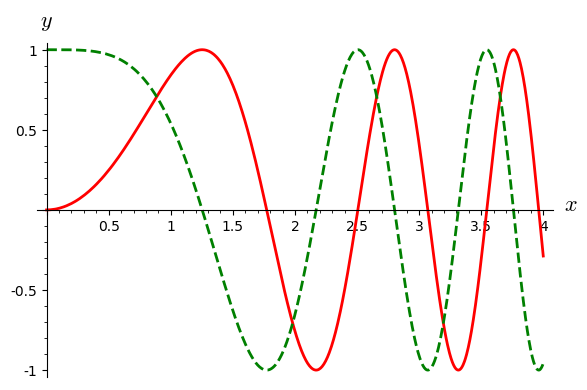

In [5]:
g1 = plot(sin(x^2), (x,0,4), color='red', thickness=2, axes_labels=[r"$x$", r"$y$"])

g2 = plot(cos(x^2), (x,0,4), color='green', linestyle='--',thickness=2)

g1 + g2

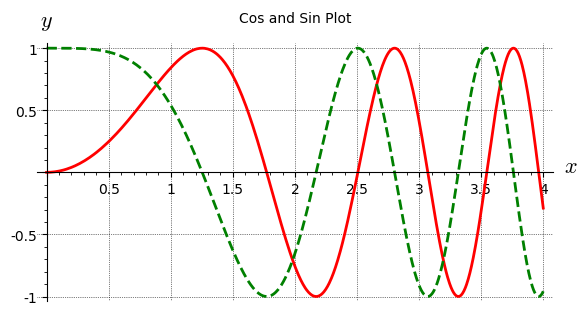

In [6]:
show(g1+g2, gridlines=True, aspect_ratio=1, title='Cos and Sin Plot')

Help for routines/functions/etc..

In [7]:
# chebyshev_T?
# hue?

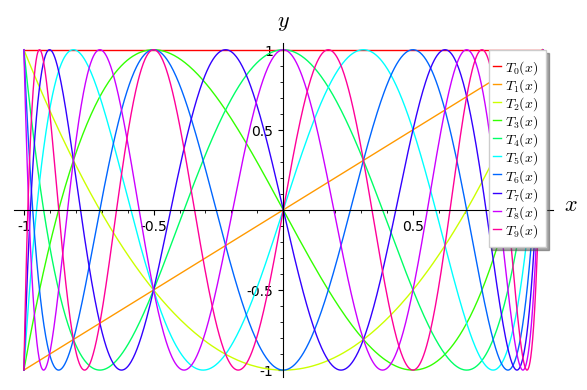

In [8]:
g = Graphics()  # an empty graphic object
for i in range(10):
    g += plot(chebyshev_T(i,x), (x,-1,1), color=hue(i/10),legend_label=r"$T_{}(x)$".format(i))
    
show(g, axes_labels=[r"$x$", r"$y$"], legend_loc='upper right')

### Plot from datasets
Consider a list of values $(x_i,y_i)$

In [9]:
data = [(numerical_approx(i/10, digits=2), numerical_approx(sin((i/10)^2))) 
        for i in range(1, 40)]

We can now plot it with list_plot :

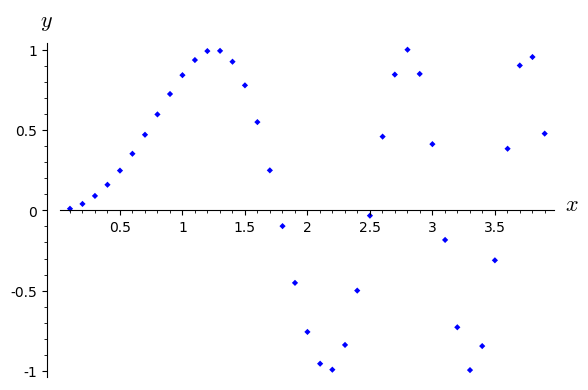

In [10]:
g1 = list_plot(data, marker='D', axes_labels=[r"$x$", r"$y$"])
g1

Or by using line :

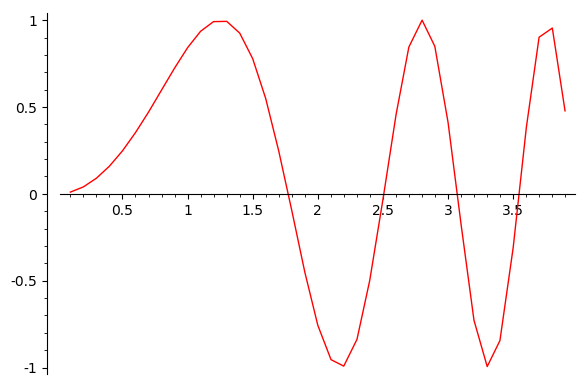

In [11]:
g2 = line(data, color='red')
g2

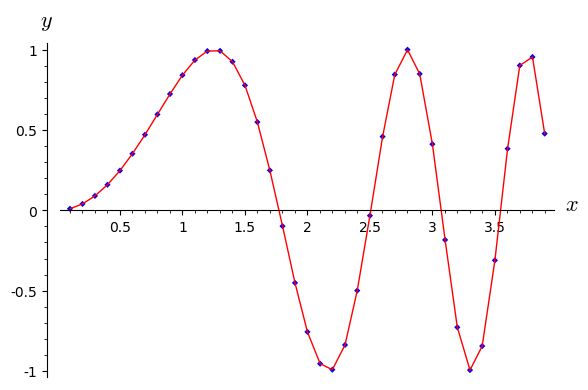

In [12]:
g1+g2

### 3D Plots
For simple 3D plots we have to first define the plotted-variables

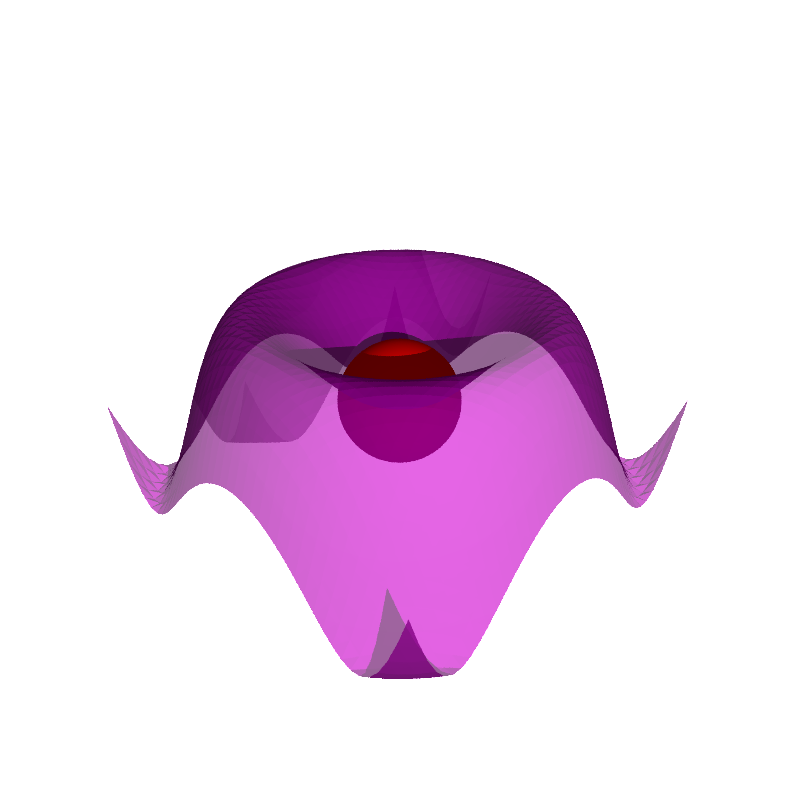

In [13]:
x,y = var('x y')

W = plot3d(sin(pi*((x)^2+(y)^2))/2,(x,-1,1),(y,-1,1), frame=False, color='purple', opacity=0.8)
S = sphere((0,0,0),size=0.3, color='red', aspect_ratio=[1,1,1])
show(W + S, viewer='tachyon', figsize=8)

In [14]:
u, v = var('u v')
f1 = (4+(3+cos(v))*sin(u), 4+(3+cos(v))*cos(u), 4+sin(v))
f2 = (8+(3+cos(v))*cos(u), 3+sin(v), 4+(3+cos(v))*sin(u))
g1 = parametric_plot3d(f1, (u,0,2*pi), (v,0,2*pi), color="red")
g2 = parametric_plot3d(f2, (u,0,2*pi), (v,0,2*pi), color="gold")
show(g1+g2, viewer='threejs', online=True)

Graphics3d Object

## 2. Function Definition + Derivative
This is a straightforward way to define and evaluate functions

In [15]:
f(x) = x^3-x
f(2)

6

Which we can plot and find its derivative easily

x |--> 3*x^2 - 1

x |--> 6*x

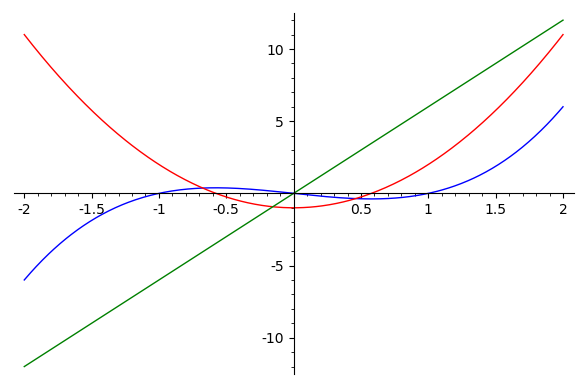

In [16]:
df = diff(f,x)
df2 = diff(f,x,2) 
display(df,df2)
plot(f,-2,2,color='blue')+plot(df,-2,2,color='red')+plot(df2,-2,2,color='green')

## 3. Equation Solvers
For example let's find the solution for : $x^2 + 9x + 15 = 0$

In [17]:
solve(x^2+9*x+15==0,x)

[x == -1/2*sqrt(21) - 9/2, x == 1/2*sqrt(21) - 9/2]

### More general case 
The solution for : $ax^2 + bx + c = 0$. We need to define the variables a,b,c.

In [18]:
var('a b c')
solve( a*x^2 + b*x + c == 0, x )

[x == -1/2*(b + sqrt(b^2 - 4*a*c))/a, x == -1/2*(b - sqrt(b^2 - 4*a*c))/a]

## Solution of linear system

For exmample the following linear system of equations,

$$ 9a+3b+c=32 $$
$$ 4a+2b+c=15 $$
$$ a+b+c=6 $$


In [19]:
eq1 = 9*a + 3*b + c == 32
eq2 = 4*a + 2*b + c == 15
eq3 = a + b + c == 6
solve([eq1,eq2,eq3],a,b,c)

[[a == 4, b == -3, c == 5]]

### Solution of Non-linear system
Consider the following system :

$$ p+q=9 $$
$$ qy+px=-6 $$
$$ qy^2+px^2=24 $$
$$ p=1 $$

In [20]:
var('p q')
eq1 = p+q == 9
eq2 = q*y + p*x == -6
eq3 = q*y^2 + p*x^2 == 24
eq4 = p == 1
solution = solve( [eq1, eq2, eq3, eq4 ], p, q, x, y )
solution

[[p == 1, q == 8, x == -4/3*sqrt(10) - 2/3, y == 1/6*sqrt(10) - 2/3], [p == 1, q == 8, x == 4/3*sqrt(10) - 2/3, y == -1/6*sqrt(10) - 2/3]]

Use the following for better manipulation of the solution.

In [21]:
display(solution[0],solution[1])

[p == 1, q == 8, x == -4/3*sqrt(10) - 2/3, y == 1/6*sqrt(10) - 2/3]

[p == 1, q == 8, x == 4/3*sqrt(10) - 2/3, y == -1/6*sqrt(10) - 2/3]

### Numerical Solver

Find the roots of the following polynomial : $ f(x)=x^5 + x^4 + x^3 - x^2 + x -1 $ for $x$ in [-1,1]

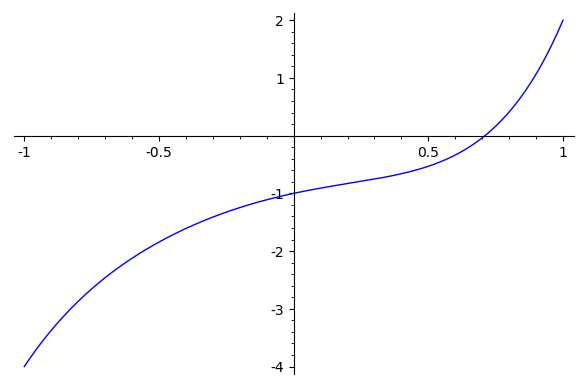

In [22]:
f(x) = x^5 + x^4 + x^3 - x^2 + x -1
plot(f,-1,1)

In [23]:
find_root(f,-1,1)

0.7104342557869125

## 4. Solving a differential equation with SageMath


In [24]:
x = var('x')
y = function('y')(x)
y

y(x)

In [25]:
eq = diff(y, x) - y == x*y^4
eq

-y(x) + diff(y(x), x) == x*y(x)^4

In [26]:
desolve(eq, y)

e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3)

In [27]:
desolve(eq, y, show_method='True')

[e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3), 'bernoulli']

In [28]:
desolve(eq, y, ics=[0, 2])

e^x/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(1/3)

In [29]:
f(x) = desolve(eq, y, ics=[0, 2])
diff(f(x), x) - f(x) - x*f(x)^4

-x*e^(4*x)/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(4/3) + 1/3*((3*x - 1)*e^(3*x) + e^(3*x))*e^x/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(4/3)

In [30]:
z = diff(f(x), x) - f(x) - x*f(x)^4
z

-x*e^(4*x)/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(4/3) + 1/3*((3*x - 1)*e^(3*x) + e^(3*x))*e^x/(-1/3*(3*x - 1)*e^(3*x) - 5/24)^(4/3)

In [31]:
z.simplify_full()

0

In [32]:
f(0)

2

### System of differential equations: desolve_system


In [33]:
y1 = function('y_1')(x)
y2 = function('y_2')(x)
y3 = function('y_3')(x)
y = vector([y1, y2, y3])
y

(y_1(x), y_2(x), y_3(x))

In [34]:
A = matrix([[2,-2,0], [-2,0,2], [0,2,2]])
A

[ 2 -2  0]
[-2  0  2]
[ 0  2  2]

In [35]:
eqs = [diff(y[i],x) == (A*y)[i] for i in range(3)]
eqs

[diff(y_1(x), x) == 2*y_1(x) - 2*y_2(x),
 diff(y_2(x), x) == -2*y_1(x) + 2*y_3(x),
 diff(y_3(x), x) == 2*y_2(x) + 2*y_3(x)]

In [36]:
for eq in eqs: show(eq)

diff(y_1(x), x) == 2*y_1(x) - 2*y_2(x)

diff(y_2(x), x) == -2*y_1(x) + 2*y_3(x)

diff(y_3(x), x) == 2*y_2(x) + 2*y_3(x)

In [37]:
sol = desolve_system(eqs, [y1,y2,y3], ics=[0, 2, 1, -2])
sol

[y_1(x) == e^(4*x) + e^(-2*x),
 y_2(x) == -e^(4*x) + 2*e^(-2*x),
 y_3(x) == -e^(4*x) - e^(-2*x)]

### Numerical Solutions - Application

In [38]:
rho = function('rho', latex_name=r'\rho')
p = function('p')
m = function('m')
Phi = function('Phi', latex_name=r'\Phi')
r = var('r')
G = var('G')

In [39]:
eq1 = diff(m(r), r) == 4*pi*r^2*rho(r)
eq2 = diff(Phi(r), r) == G*m(r)/r^2
eq3 = diff(p(r), r) == -rho(r)*G*m(r)/r^2

for eq in [eq1, eq2, eq3]:
    show(eq)

diff(m(r), r) == 4*pi*r^2*rho(r)

diff(Phi(r), r) == G*m(r)/r^2

diff(p(r), r) == -G*m(r)*rho(r)/r^2

In [40]:
k = var('k')
gam = var('gam', latex_name=r'\gamma')
p_eos(r) = k*rho(r)^gam
p_eos(r)

k*rho(r)^gam

In [41]:
eq3_rho = eq3.substitute_function(p, p_eos)
eq3_rho

gam*k*rho(r)^(gam - 1)*diff(rho(r), r) == -G*m(r)*rho(r)/r^2

In [42]:
eq3_rho = (eq3_rho / (gam*k*rho(r)^(gam-1))).simplify_full()
eq3_rho

diff(rho(r), r) == -G*rho(r)^(-gam + 2)*m(r)/(gam*k*r^2)

In [43]:
eqs = [eq1, eq2, eq3_rho]
for eq in eqs:
    show(eq)

diff(m(r), r) == 4*pi*r^2*rho(r)

diff(Phi(r), r) == G*m(r)/r^2

diff(rho(r), r) == -G*rho(r)^(-gam + 2)*m(r)/(gam*k*r^2)

In [44]:
k0 = 1/4
gam0 = 2
rhs = [eq.rhs().subs({k: k0, gam: gam0, G: 1}) for eq in eqs]
rhs

[4*pi*r^2*rho(r), m(r)/r^2, -2*m(r)/r^2]

In [45]:
unit_step?

In [46]:
rhs[0] = rhs[0] * unit_step(rho(r))
rhs[2] = rhs[2] * unit_step(rho(r))
rhs

[4*pi*r^2*rho(r)*unit_step(rho(r)), m(r)/r^2, -2*m(r)*unit_step(rho(r))/r^2]

In [47]:
rhs.append(1 * unit_step(rho(r)))
rhs

[4*pi*r^2*rho(r)*unit_step(rho(r)),
 m(r)/r^2,
 -2*m(r)*unit_step(rho(r))/r^2,
 unit_step(rho(r))]

In [48]:
var('m_1 Phi_1 rho_1 r_1')
rhs = [y.subs({m(r): m_1, Phi(r): Phi_1, rho(r): rho_1}) for y in rhs]
rhs

[4*pi*r^2*rho_1*unit_step(rho_1),
 m_1/r^2,
 -2*m_1*unit_step(rho_1)/r^2,
 unit_step(rho_1)]

In [49]:
rho_c = 1
r_min = 1e-8
r_max = 1
np = 200
delta_r = (r_max - r_min) / (np-1)

In [50]:
sol = desolve_system_rk4(rhs, vars=(m_1, Phi_1, rho_1, r_1), ivar=r, 
                         ics=[r_min, 0, 0, rho_c, r_min], 
                         end_points=r_max, step=delta_r)

In [51]:
# sol[:10]

In [52]:
rho_sol = [(s[0], s[3]) for s in sol]
rho_sol[:10]

[(1.00000000000000e-8, 1),
 (0.00502513557788945, 0.9998677813232199),
 (0.0100502611557789, 0.9995488055762576),
 (0.01507538673366835, 0.9990197361484175),
 (0.0201005123115578, 0.9982797538884585),
 (0.02512563788944725, 0.9973289643187663),
 (0.0301507634673367, 0.9961676796990266),
 (0.03517588904522615, 0.9947963237504542),
 (0.0402010146231156, 0.9932154103823944),
 (0.04522614020100505, 0.9914255372143225)]

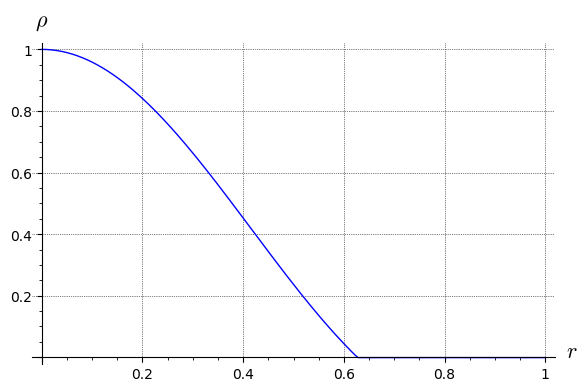

In [53]:
graph = line(rho_sol, axes_labels=[r'$r$', r'$\rho$'], gridlines=True)
graph

In [54]:
Phi_sol = [(s[0], s[2]) for s in sol]
Phi_sol[:10]

[(1.00000000000000e-8, 0),
 (0.00502513557788945, 6.61093383900868e-05),
 (0.0100502611557789, 0.000225597211871204),
 (0.01507538673366835, 0.0004901319257912),
 (0.0201005123115578, 0.000860123055770768),
 (0.02512563788944725, 0.001335517840616862),
 (0.0301507634673367, 0.001916160150486661),
 (0.03517588904522615, 0.002601838124772867),
 (0.0402010146231156, 0.003392294808802803),
 (0.04522614020100505, 0.004287231392838771)]

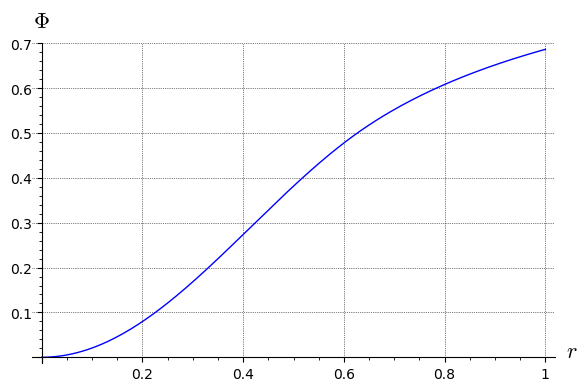

In [55]:
graph = line(Phi_sol, axes_labels=[r'$r$', r'$\Phi$'], gridlines=True)
graph